In [33]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb
from sklearn import *

In [34]:
ds = pd.read_csv("/content/creditcard.csv",sep=",")
ds.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [35]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

ds = clean_dataset(ds)

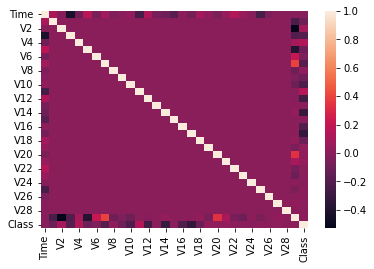

In [36]:
sb.heatmap(ds.corr())

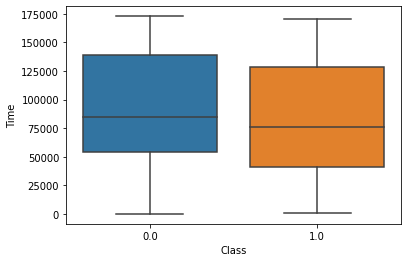

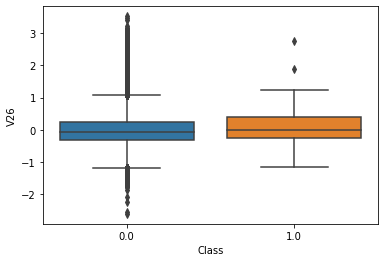

In [37]:
sb.boxplot(x="Class", y="Time", data=ds)
plt.show()
sb.boxplot(x="Class", y="V26", data=ds)
plt.show()


In [38]:
#sb.pairplot(ds)

In [39]:
minmax = preprocessing.MinMaxScaler()
columns = pd.DataFrame(minmax.fit_transform(ds))
columns_t = columns.T
train,test = model_selection.train_test_split(columns,test_size = 0.33)
x_train = train.T[:15].T
y_train = train.T[30:].T
x_test  = test.T[:15].T
y_test = test.T[30:].T
print(x_train, y_train)

              0         1         2   ...        12        13        14
29401   0.205195  0.942063  0.764817  ...  0.669174  0.390120  0.636402
150717  0.543810  0.989461  0.753910  ...  0.634893  0.661252  0.672058
89521   0.362349  0.984419  0.757953  ...  0.680576  0.435495  0.654404
250374  0.896291  0.993006  0.763810  ...  0.757805  0.561462  0.638427
207313  0.790627  0.993728  0.768888  ...  0.747547  0.543723  0.615310
...          ...       ...       ...  ...       ...       ...       ...
233336  0.853790  0.945782  0.779469  ...  0.686986  0.427552  0.613799
32040   0.211914  0.977421  0.768590  ...  0.736992  0.382265  0.658611
106226  0.404394  0.932233  0.786295  ...  0.722440  0.350617  0.704019
18404   0.170535  0.945689  0.752549  ...  0.644140  0.364471  0.638451
38478   0.228060  0.940984  0.760605  ...  0.680719  0.481291  0.631312

[190820 rows x 15 columns]          30
29401   0.0
150717  0.0
89521   0.0
250374  0.0
207313  0.0
...     ...
233336  0.0
32040   0.0


In [40]:
model_knn = neighbors.KNeighborsClassifier()
model_knn.fit(x_train, y_train.values.ravel())
y_predicted = model_knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_predicted))

0.9994573717641801


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93810
         1.0       0.99      0.72      0.83       177

    accuracy                           1.00     93987
   macro avg       1.00      0.86      0.92     93987
weighted avg       1.00      1.00      1.00     93987



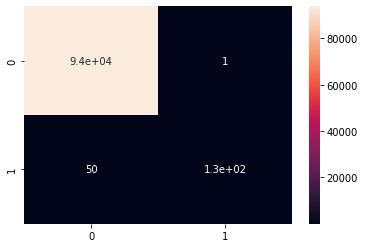

In [41]:
print(metrics.classification_report(y_test,y_predicted))
sb.heatmap(metrics.confusion_matrix(y_test,y_predicted),annot=True)

In [42]:
model_tree = tree.DecisionTreeClassifier()
model_tree.fit(x_train, y_train.values.ravel())
y_predicted = model_tree.predict(x_test)
print(metrics.accuracy_score(y_test, y_predicted))

0.9991168991456265


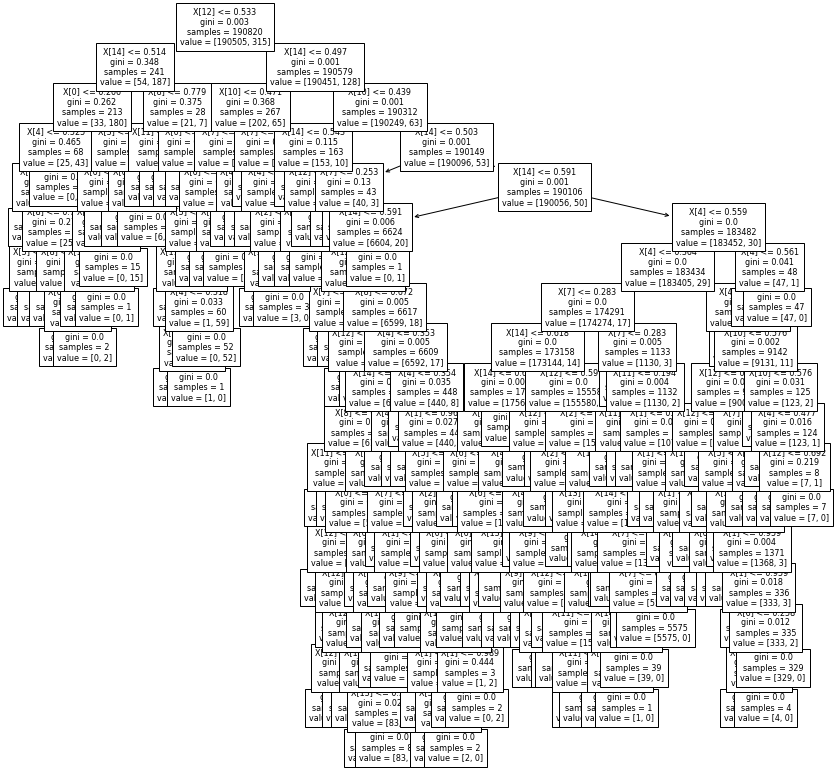

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93810
         1.0       0.78      0.73      0.76       177

    accuracy                           1.00     93987
   macro avg       0.89      0.87      0.88     93987
weighted avg       1.00      1.00      1.00     93987



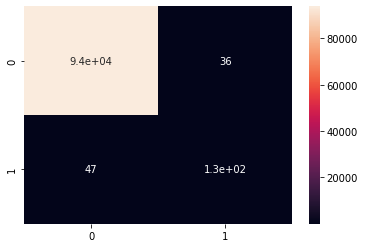

In [43]:
plt.figure(figsize=(14,14))
tree.plot_tree(model_tree, fontsize=8)
plt.show()
print(metrics.classification_report(y_test,y_predicted))
sb.heatmap(metrics.confusion_matrix(y_test,y_predicted),annot=True)

In [44]:
model_svc = svm.SVC()
model_svc.fit(x_train, y_train.values.ravel())
y_predicted = model_svc.predict(x_test)
print(metrics.accuracy_score(y_test, y_predicted))

0.9992658559162437


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93810
         1.0       0.92      0.67      0.78       177

    accuracy                           1.00     93987
   macro avg       0.96      0.84      0.89     93987
weighted avg       1.00      1.00      1.00     93987



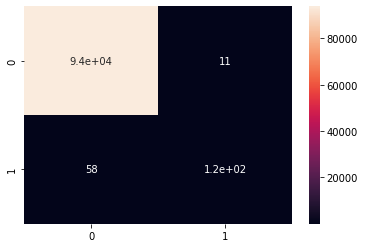

In [45]:
print(metrics.classification_report(y_test,y_predicted))
sb.heatmap(metrics.confusion_matrix(y_test,y_predicted),annot=True)

In [46]:
model_ab = ensemble.AdaBoostClassifier()
model_ab.fit(x_train, y_train.values.ravel())
y_predicted = model_ab.predict(x_test)
print(metrics.accuracy_score(y_test, y_predicted))

0.9992339366082543


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93810
         1.0       0.88      0.69      0.77       177

    accuracy                           1.00     93987
   macro avg       0.94      0.84      0.89     93987
weighted avg       1.00      1.00      1.00     93987



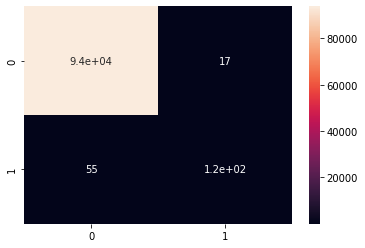

In [47]:
print(metrics.classification_report(y_test,y_predicted))
sb.heatmap(metrics.confusion_matrix(y_test,y_predicted),annot=True)

In [48]:
model_forest = ensemble.RandomForestClassifier()
model_forest.fit(x_train, y_train.values.ravel())
y_predicted = model_forest.predict(x_test)
print(metrics.accuracy_score(y_test, y_predicted))

0.9995105706108292


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     93810
         1.0       0.98      0.76      0.85       177

    accuracy                           1.00     93987
   macro avg       0.99      0.88      0.93     93987
weighted avg       1.00      1.00      1.00     93987



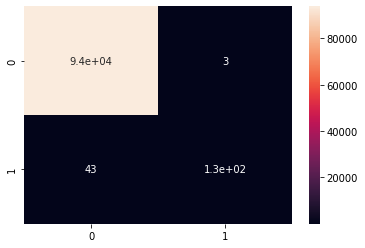

In [49]:
print(metrics.classification_report(y_test,y_predicted))
sb.heatmap(metrics.confusion_matrix(y_test,y_predicted),annot=True)

In [53]:
def best_score(model, param_grid):
  grid_search = model_selection.GridSearchCV(model, param_grid, return_train_score=True)
  grid_search.fit(x_train, y_train.values.ravel())
  results = pd.DataFrame(grid_search.cv_results_)
  print(f'The best score for {str(model)} is {grid_search.best_score_}') 
  print(f"The best parameters for {str(model)} are {grid_search.best_estimator_}")

best_score(neighbors.KNeighborsClassifier(), {'n_neighbors': [2,3,4,5,6]})

The best score for KNeighborsClassifier() is 0.9994602242951472
The best parameters for KNeighborsClassifier() are KNeighborsClassifier(n_neighbors=3)


In [54]:
best_score(tree.DecisionTreeClassifier(), {'max_depth': [4,5,6,7]})

The best score for DecisionTreeClassifier() is 0.9994602242951472
The best parameters for DecisionTreeClassifier() are DecisionTreeClassifier(max_depth=5)


In [55]:
best_score(svm.SVC(), {'C': [0.1, 1, 10],'gamma': [1, 0.1, 0.001, 0.0001]})

The best score for SVC() is 0.9994707053767948
The best parameters for SVC() are SVC(C=10, gamma=1)


In [ ]:
best_score(ensemble.AdaBoostClassifier(), {'n_estimators':[200,500,1000],'learning_rate':[0.001,0.01,0.1]})

In [ ]:
best_score(ensemble.RandomForestClassifier(), {'max_depth': [4,5,6,7], 'n_estimators': [50, 100, 200]})